In [73]:
import numpy as np
from datetime import datetime
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from keras.callbacks import TensorBoard
import keras
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True) # tirar notação científica

In [33]:
!pip install keras

     |████████████████████████████████| 269 kB 524 kB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp38-cp38-linux_x86_64.whl size=44619 sha256=d666fbadcff40264beb9f58c5627863f154f7e7f005341c3266ebadb92772f50
  Stored in directory: /home/diego/.cache/pip/wheels/13/90/db/290ab3a34f2ef0b5a0f89235dc2d40fea83e77de84ed2dc05c
Successfully built pyyaml


In [29]:
dados = [
    [.9192, .4677, .1714, .0703, .1052],
    [.7719, .9291, .3725, .1238, .0416],
    [.0654, .4459, .9397, .3263, .3686],
    [.4428, .1433, .1649, .9601, .4239],
    [.07772,.2053, .2550, .5177, .9272]
]

dados = np.array(dados)
dados

array([[0.9192 , 0.4677 , 0.1714 , 0.0703 , 0.1052 ],
       [0.7719 , 0.9291 , 0.3725 , 0.1238 , 0.0416 ],
       [0.0654 , 0.4459 , 0.9397 , 0.3263 , 0.3686 ],
       [0.4428 , 0.1433 , 0.1649 , 0.9601 , 0.4239 ],
       [0.07772, 0.2053 , 0.255  , 0.5177 , 0.9272 ]])

In [30]:
def razao_sn(real, aproximado):
    numerador = np.sum(real ** 2)
    denominador = np.sum(np.abs(real - aproximado) ** 2)
    
    return 10 * np.log10(numerador / denominador)

In [40]:
# This is the size of our encoded representations
encoding_dim = 3  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
decoding_dim = 5

# This is our input image
input_img = Input(shape=(decoding_dim,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(decoding_dim, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [48]:
autoencoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 20        
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [41]:
# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [42]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [57]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
ratios = []

epochs = 1000
tensorboard_callback = TensorBoard(log_dir='/tmp/autoencoder')

In [86]:
start = datetime.now()
for _ in range(epochs):
    autoencoder.fit(dados, dados,
                    epochs=1,
                    shuffle=True,
                    verbose=0,
                   callbacks=[tensorboard_callback])
    
    dados_aproximados = autoencoder.predict(dados)
    ratios.append(razao_sn(dados, dados_aproximados))
duration = str(datetime.now() - start).split('.')[0]
print(duration)

0:06:38


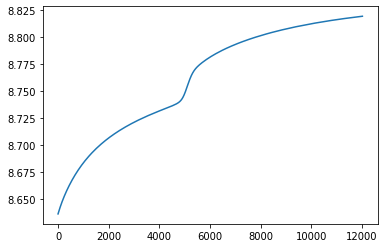

In [87]:
plt.plot(ratios)

In [112]:
dados

array([[0.9192 , 0.4677 , 0.1714 , 0.0703 , 0.1052 ],
       [0.7719 , 0.9291 , 0.3725 , 0.1238 , 0.0416 ],
       [0.0654 , 0.4459 , 0.9397 , 0.3263 , 0.3686 ],
       [0.4428 , 0.1433 , 0.1649 , 0.9601 , 0.4239 ],
       [0.07772, 0.2053 , 0.255  , 0.5177 , 0.9272 ]])

In [111]:
np.abs(dados - dados_aproximados)

array([[0.01294964, 0.04560119, 0.19856448, 0.0703    , 0.1052    ],
       [0.22797197, 0.03692158, 0.06938469, 0.1238    , 0.0416    ],
       [0.14420408, 0.18732104, 0.53143438, 0.00791767, 0.00040556],
       [0.25844513, 0.10596364, 0.2450977 , 0.22554929, 0.25155897],
       [0.10663487, 0.04396364, 0.1549977 , 0.21685071, 0.25174103]])

### segundo modelo

In [89]:
# This is our input image
input2 = Input(shape=(decoding_dim,))
encoded2 = Dense(4, activation='relu')(input2)
encoded2 = Dense(3, activation='relu')(encoded2)
# "decoded" is the lossy reconstruction of the input
decoded2 = Dense(4, activation='relu')(encoded2)
decoded2 = Dense(decoding_dim, activation='sigmoid')(decoded2)

# This model maps an input to its reconstruction
autoencoder2 = keras.Model(input2, decoded2)
autoencoder2.summary()

Model: "functional_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 15        
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 16        
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 25        
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [105]:
autoencoder2.compile(optimizer='adam', loss='mean_squared_error')
ratios2 = []

epochs = 12000
tensorboard_callback = TensorBoard(log_dir='/tmp/autoencoder')

In [106]:
start = datetime.now()
for _ in range(epochs):
    autoencoder2.fit(dados, dados,
                    epochs=1,
                    shuffle=True,
                    verbose=0,
                   callbacks=[tensorboard_callback])
    
    dados_aproximados2 = autoencoder2.predict(dados)
    ratios2.append(razao_sn(dados, dados_aproximados2))
duration = str(datetime.now() - start).split('.')[0]
print(duration)

0:19:52


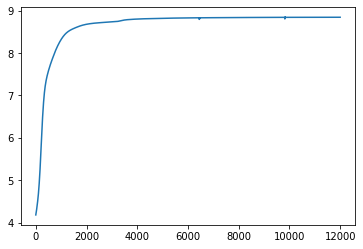

In [107]:
plt.plot(ratios2)

In [110]:
np.abs(dados - dados_aproximados2)

array([[0.00245827, 0.02887756, 0.20165564, 0.0703    , 0.1052    ],
       [0.2280727 , 0.02690514, 0.07013309, 0.1238    , 0.0416    ],
       [0.13239235, 0.18881739, 0.53131165, 0.0063627 , 0.0050144 ],
       [0.24938352, 0.11232072, 0.24375102, 0.22156322, 0.25131095],
       [0.11569648, 0.05032072, 0.15365102, 0.22083678, 0.25198905]])